In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [55]:
dataset = pd.read_csv('student-mat.csv')

In [31]:
dataset.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15


In [4]:
#Choose any two variables from your data set and check for correlations between them
X = dataset.iloc[:, 31:32].values
y = dataset.iloc[:, -1].values

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [6]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [7]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

#Calculate the precision of the algorithm or r^2
print()
print('Precision of the model:', regressor.score(X_train, y_train))


Precision of the model: 0.8260566457273237


In [8]:
print('m= ', regressor.coef_)
print('b = ', regressor.intercept_)
print('The linear regression function is: y = ', regressor.coef_, 'x + ', regressor.intercept_)


m=  [1.08762888]
b =  -1.138164068434838
The linear regression function is: y =  [1.08762888] x +  -1.138164068434838


In [9]:
print(regressor.predict([[11.2]]))

[11.0432794]


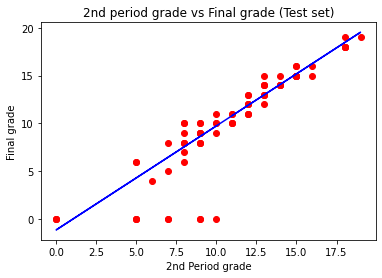

In [10]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('2nd period grade vs Final grade (Test set)')
plt.xlabel('2nd Period grade')
plt.ylabel('Final grade')
plt.show()

In [13]:
# X = dataset.iloc[:, 24:25].values
# y = dataset.iloc[:, 27:28].values
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)
# regressor = LinearRegression()
# regressor.fit(X_train, y_train)
# y_pred = regressor.predict(X_test)
# print()
# print('Precision of the model:', regressor.score(X_train, y_train))




Precision of the model: 0.01801615510439436


In [11]:
import statistics as stats
from statsmodels.formula.api import ols
import scipy.stats as stats
import statsmodels.api as sm

In [12]:
model = sm.OLS.from_formula('G3~G2', data=dataset)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     1776.
Date:                Fri, 20 Aug 2021   Prob (F-statistic):          7.63e-148
Time:                        17:02:15   Log-Likelihood:                -823.83
No. Observations:                 395   AIC:                             1652.
Df Residuals:                     393   BIC:                             1660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.3928      0.297     -4.690      0.000      -1.977      -0.809
G2             1.1021      0.026     42.139      0.000       1.051       1.154
==============================================================================
Omnibus:                      246.646   Durbin-Watson:                   1.866
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1776.620
Skew:                          -2.699   Prob(JB):                         0.00
Kurtosis:                      11.877   Cond. No.                         34.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
# cc = dataset[['G3', 'absences']].corr()
# print(cc)
# cc.G3.absences**2

                G3  absences
G3        1.000000  0.034247
absences  0.034247  1.000000


0.0011728786634827954

In [18]:
# model = sm.OLS.from_formula('G3~school+failures+absences+paid+studytime+internet',data = dataset)
# result = model.fit()
# result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.140
Model:                            OLS   Adj. R-squared:                  0.126
Method:                 Least Squares   F-statistic:                     10.51
Date:                Fri, 20 Aug 2021   Prob (F-statistic):           8.24e-11
Time:                        15:44:42   Log-Likelihood:                -1131.4
No. Observations:                 395   AIC:                             2277.
Df Residuals:                     388   BIC:                             2305.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           9.8707      0.792     12.461      0.000       8.313      11.428
school[T.MS]       -0.1086      0.683     -0.159      0.874      -1.452       1.235
paid[T.yes]         0.1870      0.449      0.416      0.677      -0.696       1.070
internet[T.yes]     0.7977      0.593      1.346      0.179      -0.367       1.963
failures           -2.1540      0.300     -7.189      0.000      -2.743      -1.565
absences            0.0293      0.027      1.072      0.285      -0.024       0.083
studytime           0.1768      0.265      0.667      0.505      -0.344       0.698
==============================================================================
Omnibus:                       30.235   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.996
Skew:                          -0.690   Prob(JB):                     2.52e-08
Kurtosis:                       3.468   Cond. No.                         42.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
#hypothesis test, H1 != 16.8
X = dataset['age']; X

0      18
1      17
2      15
3      15
4      16
       ..
390    20
391    17
392    21
393    18
394    19
Name: age, Length: 395, dtype: int64

In [15]:
stats.ttest_1samp(X, 16.8)
#average age is 16.8 years

Ttest_1sampResult(statistic=-1.6166652122771097, pvalue=0.1067509081164366)

In [16]:
#hypothesis test is H1>12

X = dataset['G1']; X
stats.ttest_1samp(X, 12.1)

Ttest_1sampResult(statistic=-7.1322795220594015, pvalue=4.7602786840541954e-12)

In [56]:
#Choose three variables and perform an ANOVA test to identify if their means are equal
#change from 4 to 3 variables as per TABA
dataset["traveltime"] = dataset.traveltime.replace({4:3})
model = ols('absences~traveltime', data = dataset).fit()
aov = sm.stats.anova_lm(model, type=2)
print(aov)
#H0 = means are equal
#H1 = means are not equal

               df        sum_sq    mean_sq         F    PR(>F)
traveltime    1.0      2.226584   2.226584  0.034678  0.852367
Residual    393.0  25233.292403  64.206851       NaN       NaN


In [57]:
#as p>0.005 we cant reject H0 , there is no evidence means are not equal
dataset["traveltime"] = dataset.traveltime.replace({1:'<15min', 2:'15-30min',3:'>30m'})

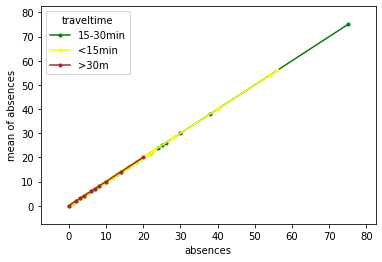

In [59]:
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt
figures = interaction_plot(x=dataset['absences'],trace=dataset['traveltime'], response=dataset['absences'], 
    colors=['green','yellow','brown'])
plt.show()

In [45]:
#anova change values to numerical
dataset["sex"] = dataset.sex.replace({'F': 0, 'M': 1})
dataset['sex'].head()

0    0
1    0
2    0
3    0
4    0
Name: sex, dtype: int64

In [39]:
dataset['sex'].tail()

390    1
391    1
392    1
393    1
394    1
Name: sex, dtype: int64

In [46]:

model = ols('sex~absences+G3+absences:G3', data = dataset).fit()
anv = sm.stats.anova_lm(model, type=2)
anv



,df,sum_sq,mean_sq,F,PR(>F)
absences,1.0,0.441531,0.441531,1.787726,0.181981
G3,1.0,1.102476,1.102476,4.463842,0.035253
absences:G3,1.0,0.357993,0.357993,1.449486,0.229339
Residual,391.0,96.568885,0.246979,NaN,NaN


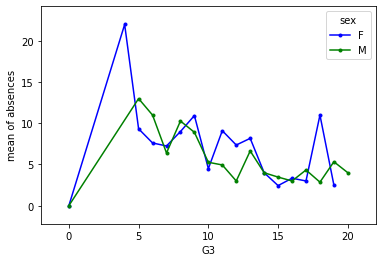

In [54]:
dataset["sex"] = dataset.sex.replace({1:'M', 0:'F'})
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt
figures = interaction_plot(x=dataset['G3'],trace=dataset['sex'], response=dataset['absences'], 
    colors=['blue','green'])
plt.show()
